In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
import numpy as np

In [3]:
data = np.load('cifar-10.npz')

In [4]:
filenames = ["x_train","y_train","x_test","y_test"]
nps = []
for filename in filenames:
    nps.append(data[filename])
train_images,train_labels,test_images,test_labels = nps

#### Shuffling, resizing images

In [5]:
from tensorflow.keras.utils import to_categorical
train_images, test_images = train_images / 255.0, test_images / 255.0
y_train_cat = to_categorical(train_labels,10)
y_test_cat  = to_categorical(test_labels,10)

In [6]:
train_images

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [7]:
import matplotlib.pyplot as plt

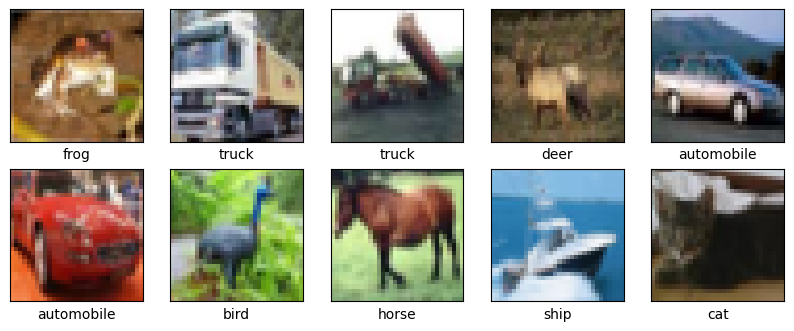

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
 #     plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [9]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

C:\Users\ASUS Vivobook\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,210 (481.29 KB)

 Trainable params: 122,890 (480.04 KB)

 Non-trainable params: 320 (1.25 KB)

In [11]:
# from keras import ImageDataGenerator

In [12]:
model.compile(optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

# datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,rotation_range=20)
# it_train = datagen.flow(train_images,y_train_cat)
# steps = int(train_images.shape[0] / 64)
# history=model.fit_generator(it_train,epochs=15,steps_per_epoch=steps,validation_data=(test_images,y_test_cat))

In [13]:
epochs=15 # set this according to your computer
history=model.fit(train_images, y_train_cat,
                  validation_data=(test_images,y_test_cat),epochs=epochs)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 62ms/step - accuracy: 0.1050 - loss: 5.4463 - val_accuracy: 0.1219 - val_loss: 8.1451
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0.1642 - loss: 6.2755 - val_accuracy: 0.1489 - val_loss: 8.4412
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 62ms/step - accuracy: 0.0949 - loss: 8.2078 - val_accuracy: 0.0637 - val_loss: 8.6544
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.0869 - loss: 8.0063 - val_accuracy: 0.1028 - val_loss: 7.0829
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 73ms/step - accuracy: 0.1000 - loss: 7.8229 - val_accuracy: 0.0959 - val_loss: 8.5582
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.0905 - loss: 8.0094 - val_accuracy: 0.0989 - val_loss: 7.5687
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.0967 - loss: 8.2402 - val_accuracy: 0.0919 - val_loss: 7.9125
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 44ms/step - accuracy: 0.09

In [14]:
test_loss,test_acc = model.evaluate(test_images,y_test_cat)
print("loss %.3f"%test_loss)
print("acc %.3f"%test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0993 - loss: 7.8142
loss 7.752
acc 0.099


In [15]:
predicted_values = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [16]:
predicted_values.shape

(10000, 10)

Text(0.5, 1.0, 'bird')

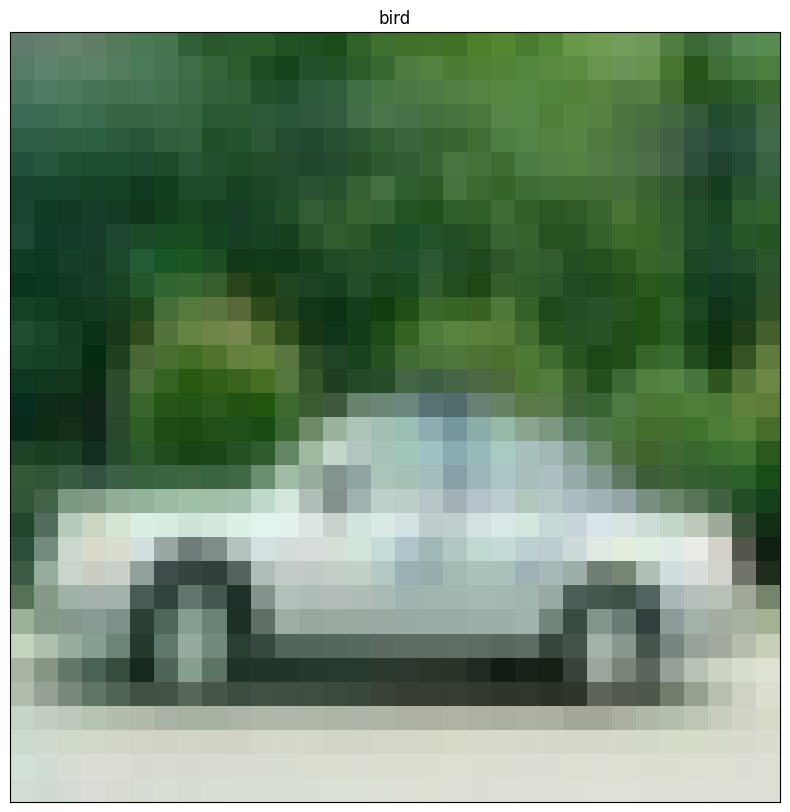

In [17]:
import random
n = random.randint(0,9999)
plt.figure(figsize=(10,10))
plt.imshow(test_images[n])
plt.yticks([])
plt.xticks([])
plt.grid(False)
plt.title(class_names[np.argmax(predicted_values[n])])

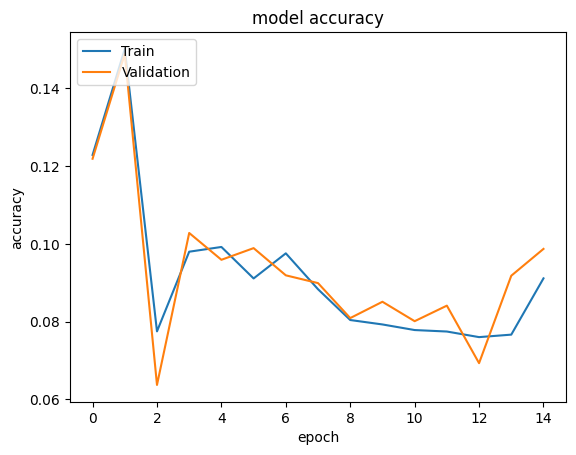

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()